# Shopify Data Science Challenge

### Problem

##### Question 1

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

a.	Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.

b.	What metric would you report for this dataset?

c.	What is its value?

### Load Packages

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load Data

In [39]:
df = pd.read_csv(r"C:\Users\18632\Downloads\2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv")
df

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11
...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16
4997,4998,56,867,351,3,cash,2017-03-19 5:42:42
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18


### Explore Data

In [40]:
df.shape

(5000, 7)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   int64 
 1   shop_id         5000 non-null   int64 
 2   user_id         5000 non-null   int64 
 3   order_amount    5000 non-null   int64 
 4   total_items     5000 non-null   int64 
 5   payment_method  5000 non-null   object
 6   created_at      5000 non-null   object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB


In [42]:
df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


In [43]:
df.isnull().any()

order_id          False
shop_id           False
user_id           False
order_amount      False
total_items       False
payment_method    False
created_at        False
dtype: bool

array([[<AxesSubplot:title={'center':'order_id'}>,
        <AxesSubplot:title={'center':'shop_id'}>],
       [<AxesSubplot:title={'center':'user_id'}>,
        <AxesSubplot:title={'center':'order_amount'}>],
       [<AxesSubplot:title={'center':'total_items'}>, <AxesSubplot:>]],
      dtype=object)

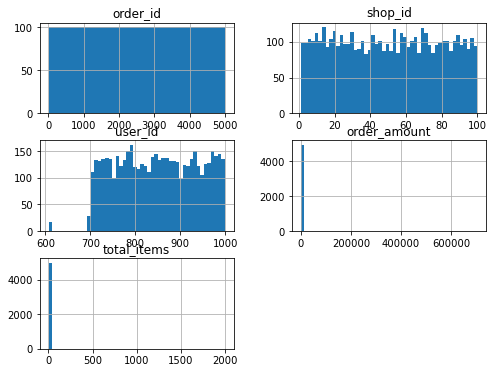

In [44]:
%matplotlib inline
df.hist(bins=50, figsize=(8,6))

I want to take a closer look at the distribution of the order amount to see if there are any outliers in the data.

[]

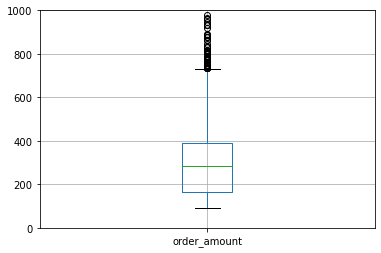

In [49]:
plt1 = df.boxplot(column=['order_amount'])
plt.ylim(ymin = 0, ymax = 1000)
plt1.plot()

[]

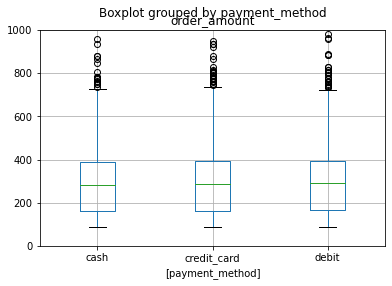

In [51]:
plt1 = df.boxplot(column=['order_amount'], by=['payment_method'])
plt.ylim(ymin = 0, ymax = 1000)
plt1.plot()

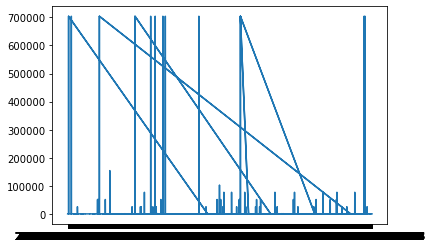

In [60]:
# I want to create a line graph showing average order amounts per day
%matplotlib inline

plt.plot(df['created_at'],df['order_amount'])
plt.show()

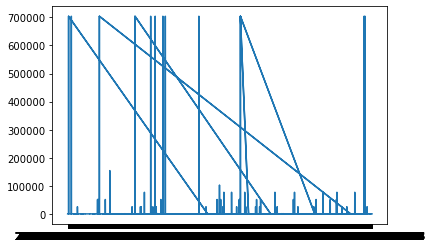

In [61]:
#do I need a summarize function?
# https://bconnelly.net/posts/summarizing_data_in_python_with_pandas/
%matplotlib inline

plt.plot(df['created_at'],df['order_amount'])
plt.show()

In [46]:
df[df['order_amount']>100000]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
691,692,78,878,154350,6,debit,2017-03-27 22:51:43
1104,1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00


### Data Cleaning

The data does not need much wrangling. The IDs are floats and could be casted to integers. However, this will not effect the solution. So I will not change those.

We could also split the created_at date column if we wanted to do heavier analytics for time (order value per day, week, year..etc).

To get a better understanding of the price of each item, I will derive the price.

In [ ]:
df["item_price"] = (df['order_amount']/df['total_items'])
df

In [14]:
df['user_id'].value_counts().count()


301

I'm checking for duplicate values. Here, I want to check if there are duplicate values for the order id. There were no duplicate observations. If there were duplicate order IDs that could cause problems which would have resulted in a higher AOV.

In [50]:
df[df.duplicated(['order_id'])]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at


Currently, the Average order value is found by dividing the total number of orders by the grand total order amount, resulting in a AOV of $3,145.

However, this does not realistically reflect the average amount of dollars spent by each customer per order.

In [16]:
df['order_amount'].sum()/df['order_id'].count()

6290.9418256

In [17]:
df['order_amount'].median()

284.0

In [18]:
df['total_items'].median()

2.0

In [19]:
df['item_price'].median()

KeyError: 'item_price'

In [20]:
sheet_url = “https://docs.google.com/spreadsheets/d/16i38oonuX1y1g7C_UAmiK9GkY7cS-64DfiDMNiR41LM/edit#gid=0"
url_1 = sheet_url.replace("/edit#gid=’, ‘/export?format=csv&gid=")
                          
pd.read_csv(url_1)

#https://www.youtube.com/watch?v=d2PvNXGrDQ0

SyntaxError: invalid character in identifier (<ipython-input-20-414c76398f70>, line 1)

In [21]:
googleSheetId = '16i38oonuX1y1g7C_UAmiK9GkY7cS-64DfiDMNiR41LM'
workseetName = 'Sheet1'
URL = 

https://docs.google.com/spreadsheets/d/16i38oonuX1y1g7C_UAmiK9GkY7cS-64DfiDMNiR41LM/edit#gid=0

df1 = pd.read_csv(URL)
df1

SyntaxError: invalid syntax (<ipython-input-21-112f98c2260e>, line 3)

##### Solution

a. The Average Order Value is derived by taking the average of the order_amount. After exploring the data, we can see that there are some extreme outliers. For instance, there are several orders made by user_id 607 that are $700,000. It is likely that these are bulk orders made by a distributer or wholeseller. Since these do not accurately reflect the average customer orders we should not consider these in our metric. 

A better metric for this data is the median. Since the outliers are the extreme cases, the median metric will....

Question 2: For this question you’ll need to use SQL. Follow this link to access the data set required for the challenge. Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.

a.	How many orders were shipped by Speedy Express in total?

b.	What is the last name of the employee with the most orders?

c.	What product was ordered the most by customers in Germany?
